<a href="https://colab.research.google.com/github/AdityaBala05/YOLO-image-classification/blob/main/Yolo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO Model for Skin Disease Classification

# INDEX
=> Model Training
*   YOLOv8-cls[n,s,m,l,x]
*   YOLO11-cls[n]

=> Model Evaluation on val and test data to get accuracy of both

=> Calculation of Precision and Recall using values from confusion matrix for both test and val (classwise and overall)


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 14.9 MB/s eta 0:00:00


# Importing Libraries and Creating train-test split

In [ ]:
import os
from sklearn.model_selection import train_test_split
import shutil
import torch
from ultralytics import YOLO
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

drive.mount('/content/drive')

data_path = "/content/drive/My Drive/Preprocessed/Preprocessed"
output_path = "/content/processed_dataset"
os.makedirs(output_path, exist_ok=True)

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_path, split), exist_ok=True)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


In [ ]:
ls "/content/processed_dataset"

test/  train/  val/


# Split data into train, val, and test (80% train, 10% val, 10% test)

In [ ]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        train_images, test_val_images = train_test_split(images, test_size=(val_ratio + test_ratio), random_state=42)
        val_images, test_images = train_test_split(test_val_images, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

        for split, split_images in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
            split_class_path = os.path.join(output_path, split, class_name)
            os.makedirs(split_class_path, exist_ok=True)
            for img in split_images:
                img_path = os.path.join(class_path, img)
                try:
                    shutil.copy(img_path, os.path.join(split_class_path, img))
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")

print("Dataset prepared with train, val, and test splits.")

Dataset prepared with train, val, and test splits.


# Copying dataset with split to "/content/drive/My Drive/YoloDataset"



In [ ]:
import shutil
import os

# Define Google Drive directory
drive_path = "/content/drive/My Drive/YoloDataset"

# Ensure directory exists
os.makedirs(drive_path, exist_ok=True)

# Copy dataset to Google Drive
shutil.copytree(output_path, os.path.join(drive_path, "dataset"), dirs_exist_ok=True)

print("Dataset copied to Google Drive successfully!")


Dataset copied to Google Drive successfully!


# Model Training

## **YOLOV8**

**Nano**

In [ ]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.31M/5.31M [00:00<00:00, 288MB/s]


In [ ]:
results = model.train(
    data=output_path,  # Path to dataset
    epochs=100,         # Number of epochs
    imgsz=300,         # Image size
    batch=32,          # Batch size
    patience=7,        # Early stopping after 5 epochs without improvement
    name='custom_yolov8_classification'  # Run name for logs
)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/processed_dataset, epochs=100, time=None, patience=7, batch=32, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_classification, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 5.35M/5.35M [00:00<00:00, 316MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[300] must be multiple of max stride 32, updating to [320]


train: Scanning /content/processed_dataset/train... 3943 images, 0 corrupt: 100%|██████████| 3943/3943 [00:01<00:00, 3830.11it/s]

train: New cache created: /content/processed_dataset/train.cache



val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<00:00, 2828.73it/s]

val: New cache created: /content/processed_dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/custom_yolov8_classification
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.996G      1.397         32        320:   6%|▌         | 7/124 [00:02<00:37,  3.14it/s]


100%|██████████| 755k/755k [00:00<00:00, 89.5MB/s]
      1/100      1.01G       1.15          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all      0.699          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.824G     0.7577          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all      0.744          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.872G      0.677          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all      0.811          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.872G     0.5904          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.872G       0.55          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.872G     0.5173          7        320: 100%|██████████| 124/124 [00:46<00:00,  2.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.872G     0.4736          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.872G     0.4605          7        320: 100%|██████████| 124/124 [00:46<00:00,  2.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.872G      0.406          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.872G     0.4073          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.872G     0.3769          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.872G     0.3775          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.872G     0.3274          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.872G     0.3014          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.872G     0.2857          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.872G     0.2959          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.872G     0.2803          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.872G     0.2898          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.872G     0.2522          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.872G     0.2755          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.872G     0.2366          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.872G     0.2215          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.872G     0.2195          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.872G     0.2157          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.872G     0.2146          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.872G     0.2133          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.872G     0.1921          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.872G     0.1799          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.872G     0.1919          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.872G     0.1832          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.872G     0.1716          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.872G     0.1712          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.872G     0.1494          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.872G     0.1517          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.872G       0.14          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.872G     0.1664          7        320: 100%|██████████| 124/124 [00:46<00:00,  2.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.872G      0.152          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.872G     0.1484          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.872G     0.1404          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.872G     0.1365          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.872G     0.1312          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all      0.878          1
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 34, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



41 epochs completed in 0.556 hours.
Optimizer stripped from runs/classify/custom_yolov8_classification/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/custom_yolov8_classification/weights/best.pt, 3.0MB

Validating runs/classify/custom_yolov8_classification/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]


                   all      0.886          1
Speed: 0.2ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/custom_yolov8_classification


## Copying results to "/content/drive/MyDrive/Runs/Yolov8n-100e/"

In [ ]:
!scp -r /content/runs/classify/custom_yolov8_classification "/content/drive/MyDrive/Runs/Yolov8n-100e/"

**Small**

In [ ]:
model = YOLO('yolov8s-cls.pt')  # Using YOLOv8 nano pretrained on ImageNet

100%|██████████| 12.3M/12.3M [00:00<00:00, 47.6MB/s]


In [ ]:
# Step 4: Train the Model with Early Stopping
results = model.train(
    data=output_path,  # Path to dataset
    epochs=100,         # Number of epochs
    imgsz=300,         # Image size
    batch=32,          # Batch size
    patience=7,        # Early stopping after 5 epochs without improvement
    name='custom_yolov8_classification'  # Run name for logs
)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/processed_dataset, epochs=100, time=None, patience=7, batch=32, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_classification2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning /content/processed_dataset/train... 3943 images, 0 corrupt: 100%|██████████| 3943/3943 [00:00<?, ?it/s]
val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/custom_yolov8_classification2
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.46G      1.087          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all      0.736          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.49G     0.6825          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      1.49G     0.5918          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]

                   all      0.801          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.49G      0.531          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.49G     0.4745          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.49G     0.4366          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.49G     0.3702          7        320: 100%|██████████| 124/124 [00:41<00:00,  2.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.49G     0.3539          7        320: 100%|██████████| 124/124 [00:41<00:00,  3.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.49G     0.3274          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.49G     0.3103          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      1.49G     0.2803          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.49G     0.2838          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.48G     0.2483          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.49G     0.2311          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.49G     0.2064          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all      0.872          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      1.49G     0.2117          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.49G     0.1996          7        320: 100%|██████████| 124/124 [00:41<00:00,  2.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.49G     0.2113          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all      0.872          1
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



18 epochs completed in 0.243 hours.
Optimizer stripped from runs/classify/custom_yolov8_classification2/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/custom_yolov8_classification2/weights/best.pt, 10.3MB

Validating runs/classify/custom_yolov8_classification2/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,080,324 parameters, 0 gradients, 12.5 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]


                   all      0.878          1
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/custom_yolov8_classification2


In [ ]:
ls "/content/runs/classify/custom_yolov8_classification"

args.yaml                                          train_batch0.jpg       val_batch1_pred.jpg
confusion_matrix_normalized.png                    train_batch1.jpg       val_batch2_labels.jpg
confusion_matrix.png                               train_batch2.jpg       val_batch2_pred.jpg
events.out.tfevents.1736923661.cc17c0e1f52f.482.0  val_batch0_labels.jpg  weights/
results.csv                                        val_batch0_pred.jpg
results.png                                        val_batch1_labels.jpg


In [ ]:
!scp -r /content/runs/classify/custom_yolov8_classification2 "/content/drive/MyDrive/Runs/Yolov8s-100e/"

**Medium**

In [ ]:
model = YOLO('yolov8m-cls.pt')  # Using YOLOv8 nano pretrained on ImageNet

100%|██████████| 32.7M/32.7M [00:00<00:00, 40.1MB/s]


In [ ]:
# Step 4: Train the Model with Early Stopping
results = model.train(
    data=output_path,  # Path to dataset
    epochs=100,         # Number of epochs
    imgsz=300,         # Image size
    batch=32,          # Batch size
    patience=7,        # Early stopping after 5 epochs without improvement
    name='custom_yolov8_classification'  # Run name for logs
)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/processed_dataset, epochs=100, time=None, patience=7, batch=32, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_classification3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning /content/processed_dataset/train... 3943 images, 0 corrupt: 100%|██████████| 3943/3943 [00:00<?, ?it/s]
val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/custom_yolov8_classification3
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      2.62G      1.068          7        320: 100%|██████████| 124/124 [00:48<00:00,  2.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all      0.742          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      2.53G     0.6477          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      2.66G     0.5743          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      2.54G     0.5025          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      2.66G     0.4641          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      2.54G     0.4014          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      2.66G     0.3752          7        320: 100%|██████████| 124/124 [00:46<00:00,  2.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      2.54G     0.3147          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      2.66G     0.3135          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      2.54G     0.3003          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      2.66G     0.2893          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      2.54G     0.2762          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.35it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      2.66G     0.2373          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      2.54G      0.198          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      2.66G     0.1915          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      2.54G     0.1959          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      2.66G     0.2055          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all      0.872          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      2.54G     0.2136          7        320: 100%|██████████| 124/124 [00:46<00:00,  2.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      2.66G     0.1628          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all      0.898          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      2.54G     0.1568          7        320: 100%|██████████| 124/124 [00:46<00:00,  2.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      2.66G     0.1492          7        320: 100%|██████████| 124/124 [00:44<00:00,  2.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      2.54G     0.1362          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.66G     0.1358          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.54G      0.146          7        320: 100%|██████████| 124/124 [00:46<00:00,  2.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.66G     0.1329          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]

                   all      0.896          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.54G     0.1344          7        320: 100%|██████████| 124/124 [00:46<00:00,  2.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]

                   all      0.896          1
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 19, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



26 epochs completed in 0.370 hours.
Optimizer stripped from runs/classify/custom_yolov8_classification3/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/custom_yolov8_classification3/weights/best.pt, 31.7MB

Validating runs/classify/custom_yolov8_classification3/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]


                   all      0.898          1
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/custom_yolov8_classification3


In [ ]:
!scp -r /content/runs/classify/custom_yolov8_classification3 "/content/drive/MyDrive/Runs/Yolov8m-100e/"

**Large**

In [ ]:
model = YOLO('yolov8l-cls.pt')  # Using YOLOv8 nano pretrained on ImageNet

100%|██████████| 71.7M/71.7M [00:03<00:00, 22.6MB/s]


In [ ]:
# Step 4: Train the Model with Early Stopping
results = model.train(
    data=output_path,  # Path to dataset
    epochs=100,         # Number of epochs
    imgsz=300,         # Image size
    batch=32,          # Batch size
    patience=7,        # Early stopping after 5 epochs without improvement
    name='custom_yolov8_classification'  # Run name for logs
)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/content/processed_dataset, epochs=100, time=None, patience=7, batch=32, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_classification4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning /content/processed_dataset/train... 3943 images, 0 corrupt: 100%|██████████| 3943/3943 [00:00<?, ?it/s]
val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/custom_yolov8_classification4
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      4.41G      1.061          7        320: 100%|██████████| 124/124 [00:54<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all      0.754          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      4.21G     0.6262          7        320: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100       4.2G     0.5636          7        320: 100%|██████████| 124/124 [00:48<00:00,  2.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      4.25G     0.5438          7        320: 100%|██████████| 124/124 [00:51<00:00,  2.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100       4.2G     0.4655          7        320: 100%|██████████| 124/124 [00:53<00:00,  2.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all      0.795          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100       4.2G     0.4261          7        320: 100%|██████████| 124/124 [00:49<00:00,  2.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      4.24G     0.4068          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      4.24G     0.3349          7        320: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100       4.2G     0.3229          7        320: 100%|██████████| 124/124 [00:48<00:00,  2.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      4.24G      0.289          7        320: 100%|██████████| 124/124 [00:50<00:00,  2.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100       4.2G     0.2958          7        320: 100%|██████████| 124/124 [00:48<00:00,  2.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      4.24G     0.2826          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100       4.2G     0.2444          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100       4.2G     0.2093          7        320: 100%|██████████| 124/124 [00:47<00:00,  2.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

                   all      0.872          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      4.24G     0.1976          7        320: 100%|██████████| 124/124 [00:50<00:00,  2.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      4.24G     0.2126          7        320: 100%|██████████| 124/124 [00:51<00:00,  2.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100       4.2G     0.1785          7        320: 100%|██████████| 124/124 [00:48<00:00,  2.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all      0.872          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100       4.2G      0.194          7        320: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100       4.2G     0.1799          7        320: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100       4.2G     0.1838          7        320: 100%|██████████| 124/124 [00:48<00:00,  2.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      4.24G     0.1727          7        320: 100%|██████████| 124/124 [00:50<00:00,  2.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100       4.2G     0.1582          7        320: 100%|██████████| 124/124 [00:48<00:00,  2.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      4.24G     0.1386          7        320: 100%|██████████| 124/124 [00:54<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      4.24G     0.1394          7        320: 100%|██████████| 124/124 [00:53<00:00,  2.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100       4.2G     0.1476          7        320: 100%|██████████| 124/124 [00:50<00:00,  2.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      4.24G     0.1234          7        320: 100%|██████████| 124/124 [00:53<00:00,  2.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100       4.2G     0.1022          7        320: 100%|██████████| 124/124 [00:52<00:00,  2.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      4.24G     0.1075          7        320: 100%|██████████| 124/124 [00:51<00:00,  2.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100       4.2G     0.1119          7        320: 100%|██████████| 124/124 [00:53<00:00,  2.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100       4.2G     0.1253          7        320: 100%|██████████| 124/124 [00:54<00:00,  2.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      4.24G     0.1174          7        320: 100%|██████████| 124/124 [00:49<00:00,  2.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all      0.872          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      4.24G    0.08586          7        320: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all      0.884          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100       4.2G    0.09463          7        320: 100%|██████████| 124/124 [00:49<00:00,  2.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all      0.882          1
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 26, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



33 epochs completed in 0.573 hours.
Optimizer stripped from runs/classify/custom_yolov8_classification4/weights/last.pt, 72.6MB
Optimizer stripped from runs/classify/custom_yolov8_classification4/weights/best.pt, 72.6MB

Validating runs/classify/custom_yolov8_classification4/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36,189,700 parameters, 0 gradients, 98.7 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]


                   all      0.894          1
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/custom_yolov8_classification4


In [ ]:
!scp -r /content/runs/classify/custom_yolov8_classification4 "/content/drive/MyDrive/Runs/Yolov8l-100e/"

**XLarge**

In [ ]:
model = YOLO('yolov8x-cls.pt')  # Using YOLOv8 xl pretrained on ImageNet

100%|██████████| 110M/110M [00:06<00:00, 18.0MB/s]


In [ ]:
output_path = "/content/drive/My Drive/YoloDataset/dataset"

In [ ]:
results = model.train(
    data=output_path,  # Path to dataset
    epochs=100,         # Number of epochs
    imgsz=300,         # Image size
    batch=32,          # Batch size
    patience=7,        # Early stopping after 5 epochs without improvement
    name='custom_yolov8_classification'  # Run name for logs
)

Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=/content/drive/My Drive/YoloDataset/dataset, epochs=100, time=None, patience=7, batch=32, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_classification3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[300] must be multiple of max stride 32, updating to [320]


train: Scanning /content/drive/My Drive/YoloDataset/dataset/train... 3943 images, 0 corrupt: 100%|██████████| 3943/3943 [00:25<00:00, 156.13it/s]


train: New cache created: /content/drive/My Drive/YoloDataset/dataset/train.cache


val: Scanning /content/drive/My Drive/YoloDataset/dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:04<00:00, 120.71it/s]


val: New cache created: /content/drive/My Drive/YoloDataset/dataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/custom_yolov8_classification3
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      5.37G      1.384         32        320:   3%|▎         | 4/124 [00:03<01:19,  1.52it/s]

      1/100      5.37G      1.397         32        320:   6%|▌         | 7/124 [00:04<01:00,  1.94it/s]
100%|██████████| 755k/755k [00:00<00:00, 97.2MB/s]
      1/100      5.37G      1.029          7        320: 100%|██████████| 124/124 [01:12<00:00,  1.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      5.59G     0.6202          7        320: 100%|██████████| 124/124 [01:09<00:00,  1.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      5.59G      0.553          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      5.59G     0.5827          7        320: 100%|██████████| 124/124 [01:08<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      5.59G     0.4939          7        320: 100%|██████████| 124/124 [01:12<00:00,  1.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      5.59G     0.4557          7        320: 100%|██████████| 124/124 [01:10<00:00,  1.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.19it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      5.59G     0.4006          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      5.59G      0.366          7        320: 100%|██████████| 124/124 [01:09<00:00,  1.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      5.59G     0.3233          7        320: 100%|██████████| 124/124 [01:07<00:00,  1.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      5.59G     0.3314          7        320: 100%|██████████| 124/124 [01:10<00:00,  1.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      5.59G      0.307          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.19it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      5.59G     0.2693          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.40it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      5.59G     0.2661          7        320: 100%|██████████| 124/124 [01:10<00:00,  1.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      5.59G     0.2172          7        320: 100%|██████████| 124/124 [01:08<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      5.59G     0.2015          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]


                   all      0.874          1

      Epoch    GPU_mem       loss  Instances       Size


     16/100      5.59G     0.2365          7        320: 100%|██████████| 124/124 [01:10<00:00,  1.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      5.59G     0.2231          7        320: 100%|██████████| 124/124 [01:09<00:00,  1.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      5.59G      0.182          7        320: 100%|██████████| 124/124 [01:06<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      5.59G     0.1624          7        320: 100%|██████████| 124/124 [01:09<00:00,  1.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      5.59G     0.1906          7        320: 100%|██████████| 124/124 [01:09<00:00,  1.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      5.59G     0.1785          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100       5.6G     0.1548          7        320: 100%|██████████| 124/124 [01:10<00:00,  1.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]


                   all      0.896          1

      Epoch    GPU_mem       loss  Instances       Size


     23/100      5.59G     0.1395          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]


                   all      0.888          1

      Epoch    GPU_mem       loss  Instances       Size


     24/100      5.59G      0.143          7        320: 100%|██████████| 124/124 [01:12<00:00,  1.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      5.59G     0.1312          7        320: 100%|██████████| 124/124 [01:09<00:00,  1.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      5.59G     0.1321          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      5.59G     0.1172          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      5.59G     0.1167          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      5.59G     0.1136          7        320: 100%|██████████| 124/124 [01:09<00:00,  1.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]


                   all      0.868          1

      Epoch    GPU_mem       loss  Instances       Size


     30/100      5.59G     0.1168          7        320: 100%|██████████| 124/124 [01:12<00:00,  1.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      5.59G    0.09368          7        320: 100%|██████████| 124/124 [01:12<00:00,  1.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      5.59G     0.1043          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      5.59G     0.1033          7        320: 100%|██████████| 124/124 [01:09<00:00,  1.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      5.59G    0.07152          7        320: 100%|██████████| 124/124 [01:10<00:00,  1.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all      0.898          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      5.59G     0.0773          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      5.59G    0.09034          7        320: 100%|██████████| 124/124 [01:11<00:00,  1.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      5.59G     0.1023          7        320: 100%|██████████| 124/124 [01:10<00:00,  1.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      5.59G      0.101          7        320: 100%|██████████| 124/124 [01:06<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      5.59G    0.07758          7        320: 100%|██████████| 124/124 [01:08<00:00,  1.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all      0.896          1


EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

39 epochs completed in 0.869 hours.
Optimizer stripped from runs/classify/custom_yolov8_classification3/weights/last.pt, 112.5MB
Optimizer stripped from runs/classify/custom_yolov8_classification3/weights/best.pt, 112.5MB

Validating runs/classify/custom_yolov8_classification3/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56,128,324 parameters, 0 gradients, 153.8 GFLOPs
train: /content/drive/My Drive/YoloDataset/dataset/train... found 3943 images in 4 classes ✅ 
val: /content/drive/My Drive/YoloDataset/dataset/val... found 492 images in 4 classes ✅ 
test: /content/drive/My Drive/YoloDataset/dataset/test... found 496 ima

               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]


                   all      0.907          1
Speed: 0.1ms preprocess, 4.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/custom_yolov8_classification3


In [ ]:
!scp -r /content/runs/classify/custom_yolov8_classification3 "/content/drive/MyDrive/YoloDataset"

***YOLO11***

**Nano**

In [ ]:
model = YOLO('yolo11n-cls.pt')  # Using YOLOv8 xl pretrained on ImageNet

100%|██████████| 5.52M/5.52M [00:00<00:00, 67.1MB/s]


In [ ]:
results = model.train(
    data=output_path,  # Path to dataset
    epochs=100,         # Number of epochs
    imgsz=300,         # Image size
    batch=32,          # Batch size
    patience=7,        # Early stopping after 5 epochs without improvement
    name='custom_yolov8_classification'  # Run name for logs
)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/processed_dataset, epochs=100, time=None, patience=7, batch=32, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_classification2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning /content/processed_dataset/train... 3943 images, 0 corrupt: 100%|██████████| 3943/3943 [00:00<?, ?it/s]
val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/custom_yolov8_classification2
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.78G      1.034          7        320: 100%|██████████| 124/124 [00:45<00:00,  2.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  2.98it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.891G     0.7099          7        320: 100%|██████████| 124/124 [00:41<00:00,  2.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]

                   all      0.756          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.883G     0.6737          7        320: 100%|██████████| 124/124 [00:42<00:00,  2.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.883G     0.6463          7        320: 100%|██████████| 124/124 [00:41<00:00,  3.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.883G      0.578          7        320: 100%|██████████| 124/124 [00:41<00:00,  2.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]

                   all      0.789          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.883G     0.5508          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.883G     0.4939          7        320: 100%|██████████| 124/124 [00:40<00:00,  3.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.883G     0.4794          7        320: 100%|██████████| 124/124 [00:41<00:00,  2.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all      0.809          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.883G     0.4659          7        320: 100%|██████████| 124/124 [00:41<00:00,  2.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.883G     0.4419          7        320: 100%|██████████| 124/124 [00:40<00:00,  3.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.883G     0.4105          7        320: 100%|██████████| 124/124 [00:41<00:00,  2.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.883G      0.423          7        320: 100%|██████████| 124/124 [00:40<00:00,  3.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.883G     0.3493          7        320: 100%|██████████| 124/124 [00:41<00:00,  3.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.883G     0.3375          7        320: 100%|██████████| 124/124 [00:41<00:00,  2.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.883G     0.3396          7        320: 100%|██████████| 124/124 [00:40<00:00,  3.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.883G     0.3341          7        320: 100%|██████████| 124/124 [00:39<00:00,  3.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.883G     0.3241          7        320: 100%|██████████| 124/124 [00:43<00:00,  2.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.883G     0.3181          7        320: 100%|██████████| 124/124 [00:41<00:00,  3.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all      0.841          1
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



18 epochs completed in 0.234 hours.
Optimizer stripped from runs/classify/custom_yolov8_classification2/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/custom_yolov8_classification2/weights/best.pt, 3.2MB

Validating runs/classify/custom_yolov8_classification2/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,531,148 parameters, 0 gradients, 3.2 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]


                   all      0.868          1
Speed: 0.3ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/custom_yolov8_classification2


In [ ]:
!scp -r /content/runs/classify/custom_yolov8_classification2 "/content/drive/MyDrive/Runs/Yolo11n-100e"

Completion of Training

# Model Evaluation

In [16]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 30.8 MB/s eta 0:00:00


In [13]:
"/content/drive/MyDrive/Runs/Yolo11n-100e"
"/content/drive/MyDrive/Runs/Yolov8l-100e/"
"/content/drive/MyDrive/Runs/Yolov8m-100e/"
"/content/drive/MyDrive/Runs/Yolov8s-100e/"
"/content/drive/MyDrive/Runs/Yolov8n-100e/"

'/content/drive/MyDrive/Runs/Yolov8n-100e/'

In [ ]:
ls "/content/drive/MyDrive/Runs/Yolov8n-100e/"

custom_yolov8_classification/


Evaluation of each model


**YOLOv8**

**Nano**

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/Runs/Yolov8n-100e/custom_yolov8_classification/weights/best.pt")

# Evaluate on validation set
metrics = model.val()

# Print accuracy
print(f"Overall Accuracy of Val data: {metrics.top1:.2f}%")

# Validate on the test set
metrics = model.val(split="test")

# Print overall accuracy
print(f"Overall Accuracy of Test data: {metrics.top1:.4f}")

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<00:00, 3524.49it/s]

val: New cache created: /content/processed_dataset/val.cache



               classes   top1_acc   top5_acc:   3%|▎         | 1/31 [00:00<00:22,  1.35it/s]


100%|██████████| 755k/755k [00:00<00:00, 75.4MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:17<00:00,  1.78it/s]


                   all      0.886          1
Speed: 0.0ms preprocess, 29.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
Overall Accuracy of Val data: 0.89%
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


test: Scanning /content/processed_dataset/test... 496 images, 0 corrupt: 100%|██████████| 496/496 [00:00<00:00, 6169.87it/s]

test: New cache created: /content/processed_dataset/test.cache



               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:18<00:00,  1.68it/s]


                   all      0.851          1
Speed: 0.0ms preprocess, 30.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2
Overall Accuracy of Test data: 0.8508


In [ ]:
!scp -r /content/runs/classify/val "/content/drive/MyDrive/Validation_of_all_models/Yolov8n-100e/val"

In [ ]:
!scp -r /content/runs/classify/val2 "/content/drive/MyDrive/Validation_of_all_models/Yolov8n-100e/test"

**Small**

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/Runs/Yolov8s-100e/custom_yolov8_classification2/weights/best.pt")

# Evaluate on validation set
metrics = model.val()

# Print accuracy
print(f"Overall Accuracy of Val data: {metrics.top1:.2f}%")

# Validate on the test set
metrics = model.val(split="test")

# Print overall accuracy
print(f"Overall Accuracy of Test data: {metrics.top1:.4f}")

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s-cls summary (fused): 73 layers, 5,080,324 parameters, 0 gradients, 12.5 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:49<00:00,  1.60s/it]


                   all      0.878          1
Speed: 0.0ms preprocess, 93.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3
Overall Accuracy of Val data: 0.88%
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


test: Scanning /content/processed_dataset/test... 496 images, 0 corrupt: 100%|██████████| 496/496 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:49<00:00,  1.59s/it]


                   all      0.877          1
Speed: 0.0ms preprocess, 92.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val4
Overall Accuracy of Test data: 0.8770


In [ ]:
!scp -r /content/runs/classify/val3 "/content/drive/MyDrive/Validation_of_all_models/Yolov8s-100e/val"

In [ ]:
!scp -r /content/runs/classify/val4 "/content/drive/MyDrive/Validation_of_all_models/Yolov8s-100e/test"

**Medium**

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/Runs/Yolov8m-100e/weights/best.pt")

# Evaluate on validation set
metrics = model.val()

# Print accuracy
print(f"Overall Accuracy of Val data: {metrics.top1:.2f}%")

# Validate on the test set
metrics = model.val(split="test")

# Print overall accuracy
print(f"Overall Accuracy of Test data: {metrics.top1:.4f}")

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-cls summary (fused): 103 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [02:17<00:00,  4.44s/it]


                   all      0.898          1
Speed: 0.0ms preprocess, 273.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val5
Overall Accuracy of Val data: 0.90%
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


test: Scanning /content/processed_dataset/test... 496 images, 0 corrupt: 100%|██████████| 496/496 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [02:14<00:00,  4.34s/it]


                   all      0.877          1
Speed: 0.0ms preprocess, 264.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val6
Overall Accuracy of Test data: 0.8770


In [ ]:
!scp -r /content/runs/classify/val5 "/content/drive/MyDrive/Validation_of_all_models/Yolov8m-100e/val"

In [ ]:
!scp -r /content/runs/classify/val6 "/content/drive/MyDrive/Validation_of_all_models/Yolov8m-100e/test"

**Large**

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/Runs/Yolov8l-100e/weights/best.pt")

# Evaluate on validation set
metrics = model.val()

# Print accuracy
print(f"Overall Accuracy of Val data: {metrics.top1:.2f}%")

# Validate on the test set
metrics = model.val(split="test")

# Print overall accuracy
print(f"Overall Accuracy of Test data: {metrics.top1:.4f}")

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 36,189,700 parameters, 0 gradients, 98.7 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [04:44<00:00,  9.19s/it]


                   all      0.894          1
Speed: 0.0ms preprocess, 573.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val7
Overall Accuracy of Val data: 0.89%
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


test: Scanning /content/processed_dataset/test... 496 images, 0 corrupt: 100%|██████████| 496/496 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [04:41<00:00,  9.07s/it]


                   all      0.891          1
Speed: 0.0ms preprocess, 561.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val8
Overall Accuracy of Test data: 0.8911


In [ ]:
!scp -r /content/runs/classify/val7 "/content/drive/MyDrive/Validation_of_all_models/Yolov8l-100e/val"

In [ ]:
!scp -r /content/runs/classify/val8 "/content/drive/MyDrive/Validation_of_all_models/Yolov8l-100e/test"

**XLarge**

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/Runs/Yolov8x-100e/weights/best.pt")

# Evaluate on validation set
metrics = model.val()

# Print accuracy
print(f"Overall Accuracy of Val data: {metrics.top1:.2f}%")

# Validate on the test set
metrics = model.val(split="test")

# Print overall accuracy
print(f"Overall Accuracy of Test data: {metrics.top1:.4f}")

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8x-cls summary (fused): 133 layers, 56,128,324 parameters, 0 gradients, 153.8 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [06:59<00:00, 13.52s/it]


                   all      0.907          1
Speed: 0.0ms preprocess, 845.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val9
Overall Accuracy of Val data: 0.91%
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


test: Scanning /content/processed_dataset/test... 496 images, 0 corrupt: 100%|██████████| 496/496 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [06:50<00:00, 13.26s/it]


                   all      0.889          1
Speed: 0.0ms preprocess, 822.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val10
Overall Accuracy of Test data: 0.8891


In [ ]:
!scp -r /content/runs/classify/val9 "/content/drive/MyDrive/Validation_of_all_models/Yolov8x-100e/val"

In [ ]:
!scp -r /content/runs/classify/val10 "/content/drive/MyDrive/Validation_of_all_models/Yolov8x-100e/test"

**YOLO11**

**Nano**

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/Runs/Yolo11n-100e/weights/best.pt")

# Evaluate on validation set
metrics = model.val()

# Print accuracy
print(f"Overall Accuracy of Val data: {metrics.top1:.2f}%")

# Validate on the test set
metrics = model.val(split="test")

# Print overall accuracy
print(f"Overall Accuracy of Test data: {metrics.top1:.4f}")

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-cls summary (fused): 112 layers, 1,531,148 parameters, 0 gradients, 3.2 GFLOPs
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


val: Scanning /content/processed_dataset/val... 492 images, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:15<00:00,  2.00it/s]


                   all       0.87          1
Speed: 0.0ms preprocess, 25.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val11
Overall Accuracy of Val data: 0.87%
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
train: /content/processed_dataset/train... found 3943 images in 4 classes ✅ 
val: /content/processed_dataset/val... found 492 images in 4 classes ✅ 
test: /content/processed_dataset/test... found 496 images in 4 classes ✅ 


test: Scanning /content/processed_dataset/test... 496 images, 0 corrupt: 100%|██████████| 496/496 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:15<00:00,  1.99it/s]


                   all      0.839          1
Speed: 0.0ms preprocess, 25.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val12
Overall Accuracy of Test data: 0.8387


In [ ]:
!scp -r /content/runs/classify/val11 "/content/drive/MyDrive/Validation_of_all_models/Yolo11n-100e/val"

In [ ]:
!scp -r /content/runs/classify/val12 "/content/drive/MyDrive/Validation_of_all_models/Yolo11n-100e/test"

In [ ]:
ls "/content/drive/MyDrive/Runs/Yolov8x-100e/weights/best.pt"

/content/drive/MyDrive/Runs/Yolov8x-100e/weights/best.pt


# Calculating Recall and Precision bold text

In [1]:
import numpy as np

**YOLOv8**

**Nano**

In [ ]:
"""Assume 'cm' is your confusion matrix loaded from the saved image or directly if available
cm = np.array([...]) # Your confusion matrix as a numpy array
Calculating True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)"""

print("Precision and Recall value for val data in Yolov8n-cls")
print()

cm = np.array([[105,6,10,9],[4,115,0,9],[0,1,112,1],[14,1,1,104]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for val data in Yolov8n-cls

Precision per class: [    0.85366     0.93496     0.91057     0.84553]
Recall per class: [    0.80769     0.89844     0.98246     0.86667]
Overall Precision: 0.8861788617886179
Overall Recall: 0.8888131536774629


In [ ]:
"""Assume 'cm' is your confusion matrix loaded from the saved image or directly if available
cm = np.array([...]) # Your confusion matrix as a numpy array
Calculating True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)"""

print("Precision and Recall value for test data in Yolov8n-cls")
print()

cm = np.array([[102,8,12,13],
              [4,110,2,3],
              [8,3,103,1],
              [10,3,7,107]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for test data in Yolov8n-cls

Precision per class: [    0.82258      0.8871     0.83065      0.8629]
Recall per class: [    0.75556     0.92437     0.89565     0.84252]
Overall Precision: 0.8508064516129032
Overall Recall: 0.8545242906017821


**Small**

In [ ]:
print("Precision and Recall value for val data in Yolov8s-cls")
print()

cm = np.array([[101,3,7,6],[8,115,2,13],[6,2,113,1],[8,3,1,103]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for val data in Yolov8s-cls

Precision per class: [    0.82114     0.93496      0.9187      0.8374]
Recall per class: [    0.86325     0.83333     0.92623     0.89565]
Overall Precision: 0.8780487804878049
Overall Recall: 0.8796157196727404


In [ ]:
print("Precision and Recall value for test data in Yolov8s-cls")
print()

cm = np.array([[98,4,2,10],[4,116,2,6],[10,3,118,5],[12,1,2,103]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for test data in Yolov8s-cls

Precision per class: [    0.79032     0.93548     0.95161     0.83065]
Recall per class: [    0.85965     0.90625     0.86765     0.87288]
Overall Precision: 0.877016129032258
Overall Recall: 0.8766068843906876


**Medium**

In [2]:
print("Precision and Recall value for val data in Yolov8m-cls")
print()

cm = np.array([[104,7,6,7],[0,112,0,5],[9,1,116,1],[10,3,1,110]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for val data in Yolov8m-cls

Precision per class: [0.84552846 0.91056911 0.94308943 0.89430894]
Recall per class: [0.83870968 0.95726496 0.91338583 0.88709677]
Overall Precision: 0.8983739837398375
Overall Recall: 0.8991143089123785


In [3]:
print("Precision and Recall value for test data in Yolov8m-cls")
print()

cm = np.array([[101,10,3,6],[2,110,4,4],[9,2,114,4],[12,2,3,110]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for test data in Yolov8m-cls

Precision per class: [0.81451613 0.88709677 0.91935484 0.88709677]
Recall per class: [0.84166667 0.91666667 0.88372093 0.86614173]
Overall Precision: 0.8770161290322581
Overall Recall: 0.8770489989623391


**Large**

In [4]:
print("Precision and Recall value for val data in Yolov8l-cls")
print()

cm = np.array([[104,5,3,6],[2,110,2,6],[3,2,115,0],[14,6,3,111]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for val data in Yolov8l-cls

Precision per class: [0.84552846 0.89430894 0.93495935 0.90243902]
Recall per class: [0.88135593 0.91666667 0.95833333 0.82835821]
Overall Precision: 0.8943089430894309
Overall Recall: 0.8961785352896534


In [6]:
print("Precision and Recall value for test data in Yolov8l-cls")
print()

cm = np.array([[95,7,1,6],[6,110,1,0],[10,1,120,1],[13,6,2,117]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for test data in Yolov8l-cls

Precision per class: [0.76612903 0.88709677 0.96774194 0.94354839]
Recall per class: [0.87155963 0.94017094 0.90909091 0.84782609]
Overall Precision: 0.8911290322580645
Overall Recall: 0.8921618923114736


**Xlarge**

In [7]:
print("Precision and Recall value for val data in Yolov8x-cls")
print()

cm = np.array([[109,7,11,3],[1,109,0,2],[6,2,111,1],[7,5,1,117]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for val data in Yolov8x-cls

Precision per class: [0.88617886 0.88617886 0.90243902 0.95121951]
Recall per class: [0.83846154 0.97321429 0.925      0.9       ]
Overall Precision: 0.9065040650406504
Overall Recall: 0.9091689560439561


In [8]:
print("Precision and Recall value for test data in Yolov8x-cls")
print()

cm = np.array([[109,11,5,5],[4,107,5,1],[6,1,109,2],[5,5,5,116]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for test data in Yolov8x-cls

Precision per class: [0.87903226 0.86290323 0.87903226 0.93548387]
Recall per class: [0.83846154 0.91452991 0.92372881 0.88549618]
Overall Precision: 0.8891129032258065
Overall Recall: 0.8905541124392204


**YOLO11**

**Nano**

In [11]:
print("Precision and Recall value for val data in Yolo11-cls")
print()

cm = np.array([[99,3,8,7],[7,113,2,9],[5,4,111,2],[12,3,2,105]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for val data in Yolo11-cls

Precision per class: [0.80487805 0.91869919 0.90243902 0.85365854]
Recall per class: [0.84615385 0.86259542 0.90983607 0.86065574]
Overall Precision: 0.8699186991869918
Overall Recall: 0.8698102673199657


In [12]:
print("Precision and Recall value for test data in Yolo11-cls")
print()

cm = np.array([[94,1,9,7],[7,114,2,10],[7,6,105,4],[16,3,8,103]])
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

#Precision and Recall for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

#For overall metrics, you might average or sum these depending on the context
precision_overall = np.mean(precision)
recall_overall = np.mean(recall)

print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"Overall Precision: {precision_overall}")
print(f"Overall Recall: {recall_overall}")

Precision and Recall value for test data in Yolo11-cls

Precision per class: [0.75806452 0.91935484 0.84677419 0.83064516]
Recall per class: [0.84684685 0.85714286 0.86065574 0.79230769]
Overall Precision: 0.8387096774193548
Overall Recall: 0.8392382835005785


best.pt for XLarge YOLOV8 model

---

"/content/drive/MyDrive/YoloDataset/custom_yolov8_classification3/weights/best.pt"

# Prediction

In [18]:
from ultralytics import YOLO
infer = YOLO("/content/drive/MyDrive/YoloDataset/custom_yolov8_classification3/weights/best.pt")
results = infer.predict("/content/drive/MyDrive//YoloDataset/dataset/test/Psoriasis/image_117.jpg", save=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



100%|██████████| 755k/755k [00:00<00:00, 31.2MB/s]

image 1/1 /content/drive/MyDrive/YoloDataset/dataset/test/Psoriasis/image_117.jpg: 320x320 Psoriasis 1.00, AK 0.00, Melanoma 0.00, Acne 0.00, 902.9ms
Speed: 59.3ms preprocess, 902.9ms inference, 0.1ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/classify/predict


In [ ]:
!scp -r /content/runs/classify/predict "/content/drive/MyDrive/Pred"

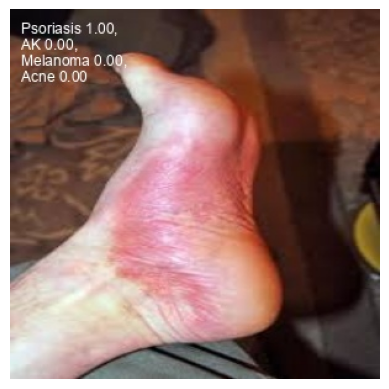

In [24]:
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/Pred/image_117.jpg"
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
